- Task: Classify News between fake or real and stop propagating false information.
- Model: 
- Dataset: https://www.kaggle.com/code/hiteshsuthar101/fake-news-prediction/data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/deep learning/data/train.csv'
df = pd.read_csv(path)
df.head(4)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1


1: Fake
0: Real

**Initial data exploaration:-**

In [4]:
df.shape # rows and columns

(20800, 5)

In [5]:
df.info() # brief information of the entire dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [6]:
# Handling missing values

print(f'The dataset contains null value: {df.isnull().sum().any()}\n') # null value check
print(f'The missing values of each column is:\n{df.isnull().sum()}\n')
print(f'The missing percentage of each column is:\n{round(df.isnull().sum()/len(df)*100)}')
df = df.dropna(axis=0) # dropped the missing value their size is verysmall compared to the data size
print(f'New data shape is{df.shape}')
print(f'The new dataset contains null value: {df.isnull().sum().any()}\n') # null value check

The dataset contains null value: True

The missing values of each column is:
id           0
title      558
author    1957
text        39
label        0
dtype: int64

The missing percentage of each column is:
id        0.0
title     3.0
author    9.0
text      0.0
label     0.0
dtype: float64
New data shape is(18285, 5)
The new dataset contains null value: False



In [7]:
# Handling duplicates

print(f'Check for duplicated rows: {df.duplicated().any()}') 

Check for duplicated rows: False


No of fake and real news are:
0    10361
1     7924
Name: label, dtype: int64


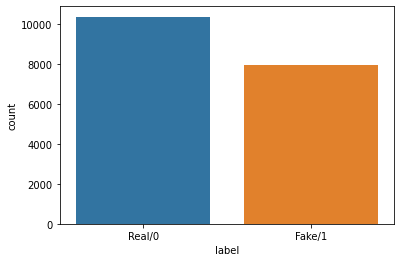

In [8]:
# Analyze the labels

print(f'No of fake and real news are:\n{df.label.value_counts()}')
lab = ['Real/0','Fake/1']
ax = sns.countplot(data=df,x='label')
ax.set_xticklabels(lab)
plt.show()


The data looks a little imbalanced as no of real news is higher than no of fake news.

In [9]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
df['No_char'] = df.title.apply(len)
df['No_words'] = df.title.apply(lambda x:len(nltk.word_tokenize(x)))


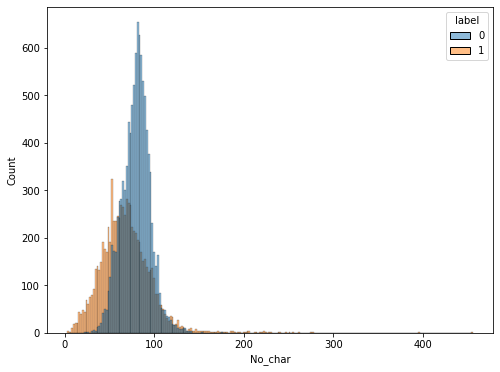

In [11]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x=df['No_char'],hue='label')
plt.show()

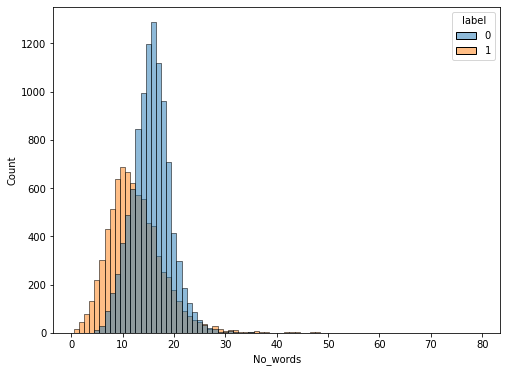

In [12]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x=df['No_words'],hue='label',discrete=True)
plt.show()

The charecter and words distribution are higher for real news than fake ones.

**Data processing:-**

In [13]:
# Dropping ID column

df1 = df.drop('id',axis=1)
df1.head(2)

,title,author,text,label,No_char,No_words
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,81,19
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,55,11


In [14]:
# combining author and title features for our model training (Not considering text column)

df1['content'] = df1['author']+ ' '+ df1['title']
df1.content[0]
df1.columns

Index(['title', 'author', 'text', 'label', 'No_char', 'No_words', 'content'], dtype='object')

In [15]:
# data preprocessing of text by a helper function

import re
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def preprocess(text):
  phrase = text.lower() # lower casing 
  # Replace apostrophe/short words
  phrase = re.sub(r"won\'t", "will not", phrase)
  phrase = re.sub(r"can\'t", "can not", phrase)
  phrase = re.sub(r"n\'t", " not", phrase)
  phrase = re.sub(r"\'re", " are", phrase)
  phrase = re.sub(r"\'s", " is", phrase)
  phrase = re.sub(r"\'d", " would", phrase)
  phrase = re.sub(r"\'ll", " will", phrase)
  phrase = re.sub(r"\'t", " not", phrase)
  phrase = re.sub(r"\'ve", " have", phrase)
  phrase = re.sub(r"\'m", " am", phrase)
  phrase = re.sub('[^A-Za-z0-9]+', ' ', phrase)
  tokenized_list = nltk.word_tokenize(phrase) # tokenizing text into words
  filtered_lemm_words = [wordnet_lemmatizer.lemmatize(word) for word in tokenized_list if word not in stopwords.words('english')] # remove stopwords and lemmatizeing
  final_text = ' '.join(filtered_lemm_words) # convert to sentence from list of tokens
  return final_text


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [16]:
# Applying the function to our dataset

df1['transformed'] = df1['content'].apply(lambda x: preprocess(x))

In [17]:
df1.transformed.head(3) # check the transformation

0    darrell lucus house dem aide even see comey le...
1    daniel j flynn flynn hillary clinton big woman...
2             consortiumnews com truth might get fired
Name: transformed, dtype: object

In [18]:
# Check the most used words in fake and real news

from collections import Counter
count_fake = Counter(' '.join(df1[df1['label'] == 1]['transformed']).split()).most_common(20)
print(f'Most common words used in fake news are:\n{count_fake}')
col = ['words','count']
df_f = pd.DataFrame(count_fake)
df_f.columns = col
count_real = Counter(' '.join(df1[df1['label'] == 0]['transformed']).split()).most_common(20)
print(f'Most common words used in real news are:\n{count_real}')
df_r = pd.DataFrame(count_real)
df_r.columns = col

Most common words used in fake news are:
[('trump', 1225), ('hillary', 911), ('clinton', 831), ('com', 502), ('u', 459), ('election', 448), ('new', 374), ('video', 337), ('comment', 333), ('admin', 329), ('noreply', 318), ('blogger', 318), ('world', 308), ('war', 306), ('fbi', 287), ('email', 274), ('obama', 246), ('news', 219), ('donald', 213), ('time', 208)]
Most common words used in real news are:
[('new', 6698), ('time', 6391), ('york', 6358), ('breitbart', 2751), ('trump', 2271), ('donald', 638), ('u', 537), ('michael', 438), ('john', 423), ('say', 369), ('news', 325), ('obama', 295), ('clinton', 292), ('charlie', 272), ('key', 269), ('state', 260), ('pam', 252), ('house', 236), ('briefing', 233), ('president', 226)]


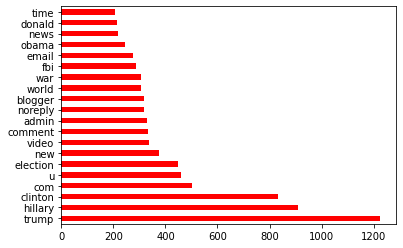

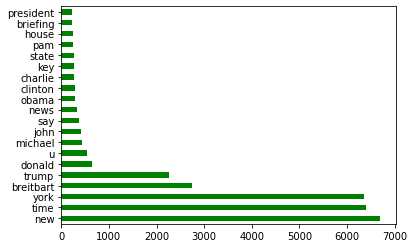

In [19]:
# Showing the most frequent words

y = np.arange(len(df_f['words']))
df_f.plot(kind='barh',color='red',legend=False)
plt.yticks(y,df_f['words'])
plt.show()
y = np.arange(len(df_f['words']))
df_r.plot(kind='barh',color='green',legend=False)
plt.yticks(y,df_r['words'])
plt.show()

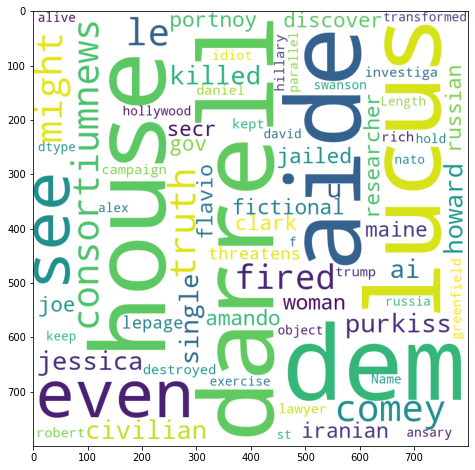

In [20]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(str(df1[df1['label']==1]['transformed']))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)

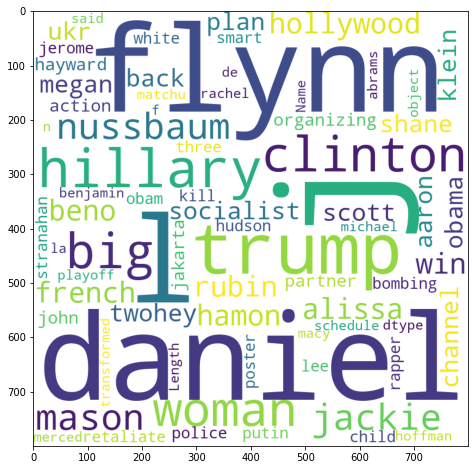

In [21]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(str(df1[df1['label']==0]['transformed']))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)

In [51]:
# Data splitting

from sklearn.model_selection import train_test_split
X = df1['transformed']
y = df1['label']
print(f'Shape of data before splitting: {X.shape} & {y.shape}')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(f'Shape of data after splitting: {X_train.shape},{y_train.shape},{X_test.shape},{y_test.shape}')

Shape of data before splitting: (18285,) & (18285,)
Shape of data after splitting: (14628,),(14628,),(3657,),(3657,)


In [52]:
# Converting to model acceptable vector format

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x_tfidf = vectorizer.fit_transform(X_train).toarray() # training data
xtest_tfidf = vectorizer.transform(X_test).toarray()  # test data

In [57]:
x_tfidf.shape,xtest_tfidf.shape,y_train.shape,y_test.shape

((14628, 18137), (3657, 18137), (14628,), (3657,))

**Model building:-**

In [58]:
# Logistic regression and binary classification

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [59]:
model.fit(x_tfidf,y_train)

LogisticRegression()

In [60]:
model.score(x_tfidf,y_train) # score of train data


0.9902242275088871

In [66]:
# prediction on test data

y_pred = model.predict(xtest_tfidf)
from sklearn.metrics import accuracy_score
print(f'Predictive score on test data: {accuracy_score(y_test.values,y_pred)}')

Predictive score on test data: 0.983866557287394


In [73]:
# Deep learning model and binary classification

import tensorflow as tf
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Dense(26,input_shape=(18137,),activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(40,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_tfidf, y_train, batch_size=32, epochs=20)

Epoch 1/20
458/458 [==============================] - 5s 9ms/step - loss: 0.2314 - accuracy: 0.8968
Epoch 2/20
458/458 [==============================] - 4s 8ms/step - loss: 0.0176 - accuracy: 0.9963
Epoch 3/20
458/458 [==============================] - 4s 8ms/step - loss: 0.0055 - accuracy: 0.9990
Epoch 4/20
458/458 [==============================] - 4s 8ms/step - loss: 0.0021 - accuracy: 0.9996
Epoch 5/20
458/458 [==============================] - 3s 7ms/step - loss: 0.0017 - accuracy: 0.9999
Epoch 6/20
458/458 [==============================] - 4s 8ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 7/20
458/458 [==============================] - 3s 7ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 8/20
458/458 [==============================] - 3s 7ms/step - loss: 8.6058e-04 - accuracy: 0.9999
Epoch 9/20
458/458 [==============================] - 3s 7ms/step - loss: 6.7637e-04 - accuracy: 1.0000
Epoch 10/20
458/458 [==============================] - 4s 8ms/step - loss: 5.6561e-04 - accu

In [74]:
y_pred_mlp = model.predict(xtest_tfidf) # predict on test data

115/115 [==============================] - 1s 5ms/step


In [ ]:
pred_list = [0 if i<.5 else 1 for i in y_pred_mlp]
pred_list

In [81]:
accuracy_score(y_test,pred_list) # accuracy score on test data

0.9860541427399507

The deep learning model performs slightly better than the logistic regressor.

In [ ]:
compare = pd.DataFrame({'Ground_Truth':y_test,'Prediction':pred_list})
compare

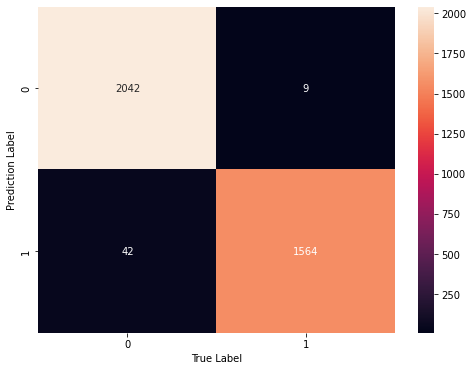

In [87]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(compare.Ground_Truth,compare.Prediction)
plt.figure(figsize=(8,6))
ax = sns.heatmap(cm, annot=True,fmt='d')
ax.set(xlabel='True Label', ylabel='Prediction Label')
plt.show()